In [1]:
library(data.table)

library(qqman)

library(stringr)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





In [2]:
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/gwas/gwas_current/meta_aric/")

In [3]:
ch <- fread("meta_aric_N3015.chr1_22.ea2378_aa637.incident_CH.out.gz", header=T, fill=T)


In [5]:
str(ch)

ch <- subset(ch, ch$eaf>=0.01 & ch$eaf<=0.99 & ch$n_studies==2)
str(ch)

Classes 'data.table' and 'data.frame':	14543964 obs. of  17 variables:
 $ rs_number       : chr  "1:603505:A:C" "1:618446:G:A" "1:649192:A:T" "1:657788:G:C" ...
 $ reference_allele: chr  "C" "A" "T" "C" ...
 $ other_allele    : chr  "A" "G" "A" "G" ...
 $ eaf             : num  0.032 0.0294 0.1038 0.8164 0.8623 ...
 $ beta            : num  -0.0149 0.1132 -0.1118 0.1609 0.0673 ...
 $ se              : num  0.32 0.239 0.195 0.167 0.141 ...
 $ beta_95L        : num  -0.643 -0.356 -0.494 -0.166 -0.209 ...
 $ beta_95U        : num  0.613 0.582 0.27 0.487 0.344 ...
 $ z               : num  -0.0465 0.4732 -0.5737 0.9656 0.4768 ...
 $ p-value         : num  0.963 0.636 0.566 0.334 0.634 ...
 $ _-log10_p-value : num  0.0164 0.1965 0.2471 0.476 0.1982 ...
 $ q_statistic     : num  0.0 8.9e-05 0.0 0.0 0.0 ...
 $ q_p-value       : num  1 0.992 1 1 1 ...
 $ i2              : num  NaN 0 NaN NaN NaN NaN NaN NaN 0 NaN ...
 $ n_studies       : int  1 2 1 1 1 1 1 1 2 1 ...
 $ n_samples       : int  -9

In [9]:
ch$chr <- as.numeric(str_split_fixed(string = ch$rs_number, pattern = ":", n=4)[,1])
ch$Pos <- as.numeric(str_split_fixed(string = ch$rs_number, pattern = ":", n=4)[,2])
str(ch)

Classes 'data.table' and 'data.frame':	6894985 obs. of  19 variables:
 $ rs_number       : chr  "1:618446:G:A" "1:663097:G:C" "1:672232:C:T" "1:697887:G:C" ...
 $ reference_allele: chr  "A" "C" "T" "C" ...
 $ other_allele    : chr  "G" "G" "C" "G" ...
 $ eaf             : num  0.0294 0.6344 0.0593 0.0242 0.0273 ...
 $ beta            : num  0.1132 0.0796 -0.1886 0.0881 0.0643 ...
 $ se              : num  0.239 0.122 0.221 0.263 0.239 ...
 $ beta_95L        : num  -0.356 -0.16 -0.621 -0.428 -0.405 ...
 $ beta_95U        : num  0.582 0.319 0.244 0.604 0.534 ...
 $ z               : num  0.473 0.652 -0.855 0.335 0.269 ...
 $ p-value         : num  0.636 0.514 0.392 0.738 0.788 ...
 $ _-log10_p-value : num  0.196 0.289 0.406 0.132 0.103 ...
 $ q_statistic     : num  0.000089 0.017065 0.066806 0.000822 0.002392 ...
 $ q_p-value       : num  0.992 0.896 0.796 0.977 0.961 ...
 $ i2              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ n_studies       : int  2 2 2 2 2 2 2 2 2 2 ...
 $ n_samples     

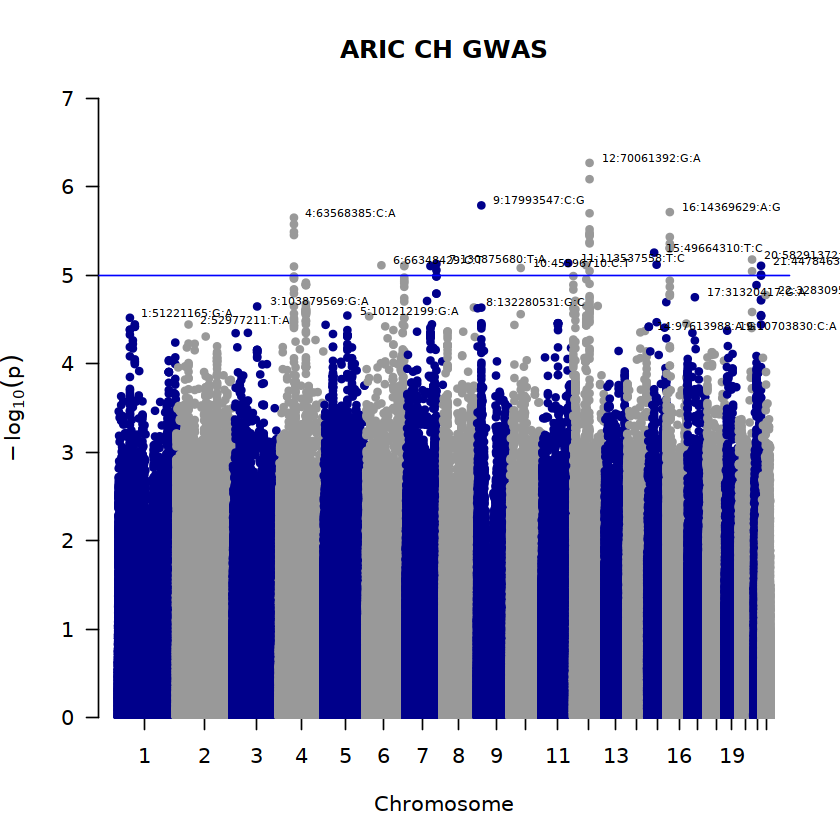

In [10]:
manhattan(x = ch, chr = "chr", 
          bp = "Pos", p = "p-value", 
          snp = "rs_number", col = c("darkblue", "gray60"),
          annotatePval=5e-5, annotateTop =TRUE,
         main="ARIC incident CH GWAS")

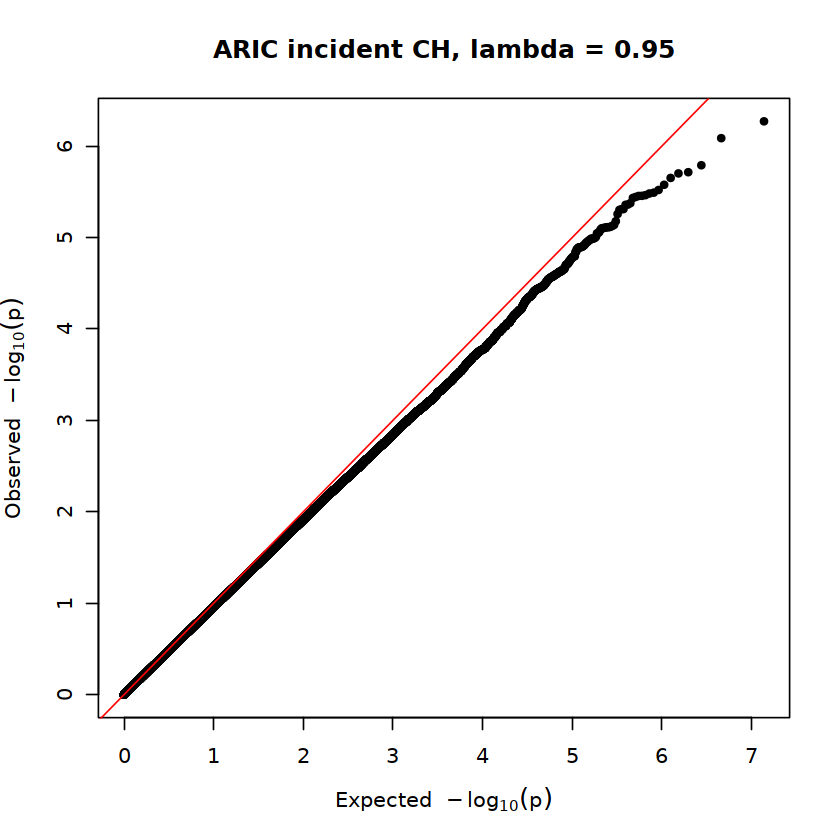

In [12]:
qq(ch$`p-value`, main=paste0("ARIC incident CH, lambda = ", round(median(qchisq(1 - ch$`p-value`, 1), na.rm = T)/qchisq(0.5,1), 2)))

In [7]:
dta <- fread("meta_aric_N3015.chr1_22.ea2378_aa637.incident_DTA.out.gz", header=T, fill=T)
dta$chr <- as.numeric(str_split_fixed(string = dta$rs_number, pattern = ":", n=4)[,1])
dta$Pos <- as.numeric(str_split_fixed(string = dta$rs_number, pattern = ":", n=4)[,2])

dnmt <- fread("meta_aric_N3015.chr1_22.ea2378_aa637.incident_DNMT3A.out.gz", header=T, fill=T)
dnmt$chr <- as.numeric(str_split_fixed(string = dnmt$rs_number, pattern = ":", n=4)[,1])
dnmt$Pos <- as.numeric(str_split_fixed(string = dnmt$rs_number, pattern = ":", n=4)[,2])

tet2 <- fread("meta_aric_N3015.chr1_22.ea2378_aa637.incident_TET2.out.gz", header=T, fill=T)
tet2$chr <- as.numeric(str_split_fixed(string = tet2$rs_number, pattern = ":", n=4)[,1])
tet2$Pos <- as.numeric(str_split_fixed(string = tet2$rs_number, pattern = ":", n=4)[,2])

asxl1 <- fread("meta_aric_N3015.chr1_22.ea2378_aa637.incident_ASXL1.out.gz", header=T, fill=T)
asxl1$chr <- as.numeric(str_split_fixed(string = asxl1$rs_number, pattern = ":", n=4)[,1])
asxl1$Pos <- as.numeric(str_split_fixed(string = asxl1$rs_number, pattern = ":", n=4)[,2])

ddr <- fread("meta_aric_N3015.chr1_22.ea2378_aa637.incident_DDR.out.gz", header=T, fill=T)
ddr$chr <- as.numeric(str_split_fixed(string = ddr$rs_number, pattern = ":", n=4)[,1])
ddr$Pos <- as.numeric(str_split_fixed(string = ddr$rs_number, pattern = ":", n=4)[,2])

sf <- fread("meta_aric_N3015.chr1_22.ea2378_aa637.incident_SF.out.gz", header=T, fill=T)
sf$chr <- as.numeric(str_split_fixed(string = sf$rs_number, pattern = ":", n=4)[,1])
sf$Pos <- as.numeric(str_split_fixed(string = sf$rs_number, pattern = ":", n=4)[,2])

ch_growth <- fread("meta_aric_N3015.chr1_22.ea2378_aa637.incident_CH_or_growingClones.out.gz", header=T, fill=T)
ch_growth$chr <- as.numeric(str_split_fixed(string = ch_growth$rs_number, pattern = ":", n=4)[,1])
ch_growth$Pos <- as.numeric(str_split_fixed(string = ch_growth$rs_number, pattern = ":", n=4)[,2])


In [8]:
ch_growth$Pos <- as.numeric(str_split_fixed(string = ch_growth$rs_number, pattern = ":", n=4)[,2])

In [11]:
#### RG2022 CHIP GWAS
rg22.chip_hg38tohg19 <- fread("../../rg2022/ch_rg22.hg19.csv", 
                              header = T, sep = ",")
names(rg22.chip_hg38tohg19)
rg22.chip_hg38tohg19 <- rg22.chip_hg38tohg19[, c(1:4,9,11,12,13,14,15,48:51,38)]

rg22.dnmt3a_hg38tohg19 <- fread("../../rg2022/dnmt3a_rg22.hg19.csv", 
                                header = T, sep = ",")
names(rg22.dnmt3a_hg38tohg19) 
rg22.dnmt3a_hg38tohg19 <- rg22.dnmt3a_hg38tohg19[, c(1:4,9,11,12,13,14,15,45:48,38)]
names(rg22.dnmt3a_hg38tohg19) <-  names(rg22.chip_hg38tohg19)

rg22.tet2_hg38tohg19 <- fread("../../rg2022/tet2_rg22.hg19.csv", 
                              header = T, sep = ",")
rg22.tet2_hg38tohg19$locus <- c("11-1","14-1","14-1","17-1","3-1","3-2","5-1","5-1")
names(rg22.tet2_hg38tohg19)
rg22.tet2_hg38tohg19 <- rg22.tet2_hg38tohg19[, c(1:3,48,8,10:14,44:47,37)]
names(rg22.tet2_hg38tohg19) <-  names(rg22.chip_hg38tohg19)


rg22_ch_dnmt_tet <- as.data.frame(rbind(rg22.chip_hg38tohg19, rg22.dnmt3a_hg38tohg19, rg22.tet2_hg38tohg19))

# fwrite(rg22_ch_dnmt_tet, "../../rg2022/rg22_ch_dnmt_tet.hg19.csv", 
 #   col.names = T, row.names = F, sep = ",", na="NA")


[1] "varID"             "chr_hg19"          "POS_hg19"         
 [4] "locus"             "Chr"               "Pos"              
 [7] "Ref"               "Alt"               "Trait"            
[10] "Model"             "Effect_UKB"        "LCI_Effect_UKB"   
[13] "UCI_Effect_UKB"    "Pval_UKB"          "AAF_UKB"          
[16] "Num_Cases_UKB"     "Cases_Ref_UKB"     "Cases_Het_UKB"    
[19] "Cases_Alt_UKB"     "Num_Controls_UKB"  "Controls_Ref_UKB" 
[22] "Controls_Het_UKB"  "Controls_Alt_UKB"  "Model_GHS"        
[25] "Effect_GHS"        "LCI_Effect_GHS"    "UCI_Effect_GHS"   
[28] "Pval_GHS"          "AAF_GHS"           "Num_Cases_GHS"    
[31] "Cases_Ref_GHS"     "Cases_Het_GHS"     "Cases_Alt_GHS"    
[34] "Num_Controls_GHS"  "Controls_Ref_GHS"  "Controls_Het_GHS" 
[37] "Controls_Alt_GHS"  "nearestGene"       "dist_nearestGene" 
[40] "variantEffect"     "CADD"              "maxCADD_inLD"     
[43] "Lof_Missense_inLD" "Same_Direction"    "Effect_adj"       
[46] "LCI_Effect_adj"    "UCI_Effect_adj"    "CHROM"            
[49] "varID_hg19"        "Start_500kb"       "End_500kb"

[1] "varID"             "chr_hg19"          "POS_hg19"         
 [4] "locus"             "chr"               "pos"              
 [7] "ref"               "alt"               "trait"            
[10] "model"             "effect_UKB"        "lci_effect_UKB"   
[13] "uci_effect_UKB"    "pval_UKB"          "aaf_UKB"          
[16] "num_cases_UKB"     "cases_ref_UKB"     "cases_het_UKB"    
[19] "cases_alt_UKB"     "num_controls_UKB"  "controls_ref_UKB" 
[22] "controls_het_UKB"  "controls_alt_UKB"  "model_GHS"        
[25] "effect_GHS"        "lci_effect_GHS"    "uci_effect_GHS"   
[28] "pval_GHS"          "aaf_GHS"           "num_cases_GHS"    
[31] "cases_ref_GHS"     "cases_het_GHS"     "cases_alt_GHS"    
[34] "num_controls_GHS"  "controls_ref_GHS"  "controls_het_GHS" 
[37] "controls_alt_GHS"  "nearestGene"       "dist_nearestGene" 
[40] "variantEffect"     "CADD"              "maxCADD_inLD"     
[43] "Lof_Missense_inLD" "Same_Direction"    "CHROM"            
[46] "varID_hg19"        "Start_500kb"       "End_500kb"

[1] "varID"             "chr_hg19"          "POS_hg19"         
 [4] "chr"               "pos"               "ref"              
 [7] "alt"               "trait"             "model"            
[10] "effect_UKB"        "lci_effect_UKB"    "uci_effect_UKB"   
[13] "pval_UKB"          "aaf_UKB"           "num_cases_UKB"    
[16] "cases_ref_UKB"     "cases_het_UKB"     "cases_alt_UKB"    
[19] "num_controls_UKB"  "controls_ref_UKB"  "controls_het_UKB" 
[22] "controls_alt_UKB"  "model_GHS"         "effect_GHS"       
[25] "lci_effect_GHS"    "uci_effect_GHS"    "pval_GHS"         
[28] "aaf_GHS"           "num_cases_GHS"     "cases_ref_GHS"    
[31] "cases_het_GHS"     "cases_alt_GHS"     "num_controls_GHS" 
[34] "controls_ref_GHS"  "controls_het_GHS"  "controls_alt_GHS" 
[37] "nearestGene"       "dist_nearestGene"  "variantEffect"    
[40] "CADD"              "maxCADD_inLD"      "Lof_Missense_inLD"
[43] "Same_Direction"    "CHROM"             "varID_hg19"       
[46] "Start_500kb"       "End_500kb"         "locus"

In [17]:
# fwrite(rg22_ch_dnmt_tet[,c(2,13,14,1,3:12,15)], "../../rg2022/rg22_ch_dnmt_tet.hg19.tsv", 
 #   col.names = T, row.names = F, sep = "\t", na="NA", quote=F)

In [13]:
rg22_ch_dnmt_tet <- fread("../../rg2022/rg22_ch_dnmt_tet.hg19.csv", header=T)
str(rg22_ch_dnmt_tet)
ls()

Classes 'data.table' and 'data.frame':	118 obs. of  15 variables:
 $ varID         : chr  "1:226374920:A:C" "10:103908421:C:CTT" "11:108043157:T:C" "11:108435509:C:A" ...
 $ chr_hg19      : int  1 10 11 11 11 12 14 17 17 17 ...
 $ POS_hg19      : int  226562621 105668179 107913884 108306236 108315606 26589770 101178715 55463857 7571752 7731041 ...
 $ locus         : chr  "1-1" "10-1" "11-1" "11-1" ...
 $ Trait         : chr  "CHIP_inclusive" "CHIP_inclusive" "CHIP_inclusive" "CHIP_inclusive" ...
 $ Effect_UKB    : num  1.115 0.914 0.921 1.12 1.228 ...
 $ LCI_Effect_UKB: num  1.086 0.887 0.896 1.099 1.162 ...
 $ UCI_Effect_UKB: num  1.144 0.943 0.948 1.141 1.298 ...
 $ Pval_UKB      : num  2.41e-16 8.41e-09 9.92e-09 1.43e-32 3.97e-13 ...
 $ AAF_UKB       : num  0.8416 0.9012 0.1282 0.4077 0.0255 ...
 $ CHROM         : chr  "chr1" "chr10" "chr11" "chr11" ...
 $ varID_hg19    : chr  "1:226562621:A:C" "10:105668179:C:CTT" "11:107913884:T:C" "11:108306236:C:A" ...
 $ Start_500kb   : int  22

[1] "asxl1"                  "ch"                     "ch_growth"             
 [4] "ddr"                    "dnmt"                   "dta"                   
 [7] "rg22.chip_hg38tohg19"   "rg22.dnmt3a_hg38tohg19" "rg22.tet2_hg38tohg19"  
[10] "rg22_ch_dnmt_tet"       "sf"                     "tet2"

In [ ]:
 fwrite(rg22_ch_dnmt_tet, "../../rg2022/rg22_ch_dnmt_tet.hg19.tsv", 
    col.names = T, row.names = F, sep = "\t", na="NA")

In [14]:
# save.image(file="aric.meta_gwas.April_2023.rda")

In [5]:
load("aric.meta_gwas.April_2023.rda")
ls()

[1] "asxl1"            "ch"               "ch_growth"        "ddr"             
[5] "dnmt"             "dta"              "rg22_ch_dnmt_tet" "sf"              
[9] "tet2"

In [ ]:
# zcat meta_aric_N3015.chr1_22.ea2378_aa637.incident_CH_or_growingClones.out.gz | awk '$4>=0.01 && $4>=0.99 && $10<0.1' | sed 's:\::\t:g' |  sed 's:\::\t:g' | awk 'NR>1{print $1"\t"$2"\t"$2"\t"$0}' > p10.meta_aric_N3015.chr1_22.ea2378_aa637.incident_CH_or_growingClones.out &
# zcat meta_aric_N3015.chr1_22.ea2378_aa637.incident_CH.out.gz | awk '$4>=0.01 && $4<=0.99 && $10<0.1' | sed 's:\::\t:g' | sed 's:\::\t:g' | awk 'NR>1{print $1"\t"$2"\t"$2"\t"$0}' > p10.meta_aric_N3015.chr1_22.ea2378_aa637.incident_CH.out
# zcat meta_aric_N3015.chr1_22.ea2378_aa637.incident_DTA.out.gz | awk '$4>=0.01 && $4<=0.99 && $10<0.1' | sed 's:\::\t:g' | sed 's:\::\t:g' | awk 'NR>1{print $1"\t"$2"\t"$2"\t"$0}' > p10.meta_aric_N3015.chr1_22.ea2378_aa637.incident_DTA.out &
# zcat meta_aric_N3015.chr1_22.ea2378_aa637.incident_SF.out.gz | awk '$4>=0.01 && $4<=0.99 && $10<0.1' | sed 's:\::\t:g' | sed 's:\::\t:g' | awk 'NR>1{print $1"\t"$2"\t"$2"\t"$0}' > p10.meta_aric_N3015.chr1_22.ea2378_aa637.incident_SF.out &
# zcat meta_aric_N3015.chr1_22.ea2378_aa637.incident_DDR.out.gz | awk '$4>=0.01 && $4<=0.99 && $10<0.1' | sed 's:\::\t:g' | sed 's:\::\t:g' | awk 'NR>1{print $1"\t"$2"\t"$2"\t"$0}' > p10.meta_aric_N3015.chr1_22.ea2378_aa637.incident_DDR.out &
# zcat meta_aric_N3015.chr1_22.ea2378_aa637.incident_DNMT3A.out.gz | awk '$4>=0.01 && $4<=0.99 && $10<0.1' | sed 's:\::\t:g' | sed 's:\::\t:g' | awk 'NR>1{print $1"\t"$2"\t"$2"\t"$0}' > p10.meta_aric_N3015.chr1_22.ea2378_aa637.incident_DNMT3A.out &
# zcat meta_aric_N3015.chr1_22.ea2378_aa637.incident_TET2.out.gz | awk '$4>=0.01 && $4<=0.99 && $10<0.1' | sed 's:\::\t:g' | sed 's:\::\t:g' | awk 'NR>1{print $1"\t"$2"\t"$2"\t"$0}' > p10.meta_aric_N3015.chr1_22.ea2378_aa637.incident_TET2.out &
# zcat meta_aric_N3015.chr1_22.ea2378_aa637.incident_ASXL1.out.gz | awk '$4>=0.01 && $4<=0.99 && $10<0.1' | sed 's:\::\t:g' | sed 's:\::\t:g' | awk 'NR>1{print $1"\t"$2"\t"$2"\t"$0}' > p10.meta_aric_N3015.chr1_22.ea2378_aa637.incident_ASXL1.out 

In [9]:
ls()
str(ch_growth)

[1] "asxl1"            "ch"               "ch_growth"        "ddr"             
[5] "dnmt"             "dta"              "rg22_ch_dnmt_tet" "sf"              
[9] "tet2"

Classes 'data.table' and 'data.frame':	14679113 obs. of  19 variables:
 $ rs_number       : chr  "1:603505:A:C" "1:618446:G:A" "1:649192:A:T" "1:657788:G:C" ...
 $ reference_allele: chr  "C" "A" "T" "C" ...
 $ other_allele    : chr  "A" "G" "A" "G" ...
 $ eaf             : num  0.0324 0.0294 0.1033 0.8172 0.8628 ...
 $ beta            : num  0.1169 0.1447 -0.1546 0.1951 0.0731 ...
 $ se              : num  0.279 0.21 0.174 0.149 0.126 ...
 $ beta_95L        : num  -0.4298 -0.2661 -0.4952 -0.0971 -0.1746 ...
 $ beta_95U        : num  0.664 0.556 0.186 0.487 0.321 ...
 $ z               : num  0.419 0.69 -0.89 1.308 0.578 ...
 $ p-value         : num  0.675 0.49 0.374 0.191 0.563 ...
 $ _-log10_p-value : num  0.171 0.31 0.428 0.72 0.249 ...
 $ q_statistic     : num  0 0.139 0 0 0 ...
 $ q_p-value       : num  1 0.709 1 1 1 ...
 $ i2              : num  NaN 0 NaN 0 NaN NaN NaN NaN 0 NaN ...
 $ n_studies       : int  1 2 1 1 1 1 1 1 2 1 ...
 $ n_samples       : int  -9 -9 -9 -9 -9 -9 -9 -9

In [ ]:
## Overlap with RG2022

# for files in $(ls -lhv /medpop/esp2/mesbah/projects/ch_progression/aric/gwas/gwas_current/meta_aric/p10.meta_aric_N3015.chr1_22.ea2378_aa637.incident_*.out | awk '{print $NF}'); do intersectBed -a <(awk 'NR>1' /medpop/esp2/mesbah/projects/ch_progression/aric/gwas/rg2022/rg22_ch_dnmt_tet.hg19.tsv | sort -V -k 4 ) -b ${files} -wb > /medpop/esp2/mesbah/projects/ch_progression/aric/gwas/gwas_current/meta_aric/overlap.$(basename ${files} ".out").tsv; done &
## WAO
# for files in $(ls -lhv /medpop/esp2/mesbah/projects/ch_progression/aric/gwas/gwas_current/meta_aric/p10.meta_aric_N3015.chr1_22.ea2378_aa637.incident_*.out | awk '{print $NF}'); do intersectBed -a <(awk 'NR>1' /medpop/esp2/mesbah/projects/ch_progression/aric/gwas/rg2022/rg22_ch_dnmt_tet.hg19.tsv | sort -V -k 4 ) -b ${files} -wao > /medpop/esp2/mesbah/projects/ch_progression/aric/gwas/gwas_current/meta_aric/overlap.$(basename ${files} ".out").wao.tsv; done &

In [10]:
# tet2[tet2$`p-value`<=0.05 & tet2$chr %in% rg22_ch_dnmt_tet$chr_hg19 & (tet2$rs_number %in% unique(c(mmu.tet2$varID, mmu.dnmt3a$varID, mmu.ch$varID))),]
for (i in length(rg22_ch_dnmt_tet)){
table(tet2$`p-value`<=0.05 & tet2$chr %in% rg22_ch_dnmt_tet$chr_hg19 & tet2$Pos >= rg22_ch_dnmt_tet$Start_500kb & tet2$Pos <= rg22_ch_dnmt_tet$End_500kb )
}

Warning message in tet2$Pos >= rg22_ch_dnmt_tet$Start_500kb:
"longer object length is not a multiple of shorter object length"
Warning message in tet2$Pos <= rg22_ch_dnmt_tet$End_500kb:
"longer object length is not a multiple of shorter object length"



   FALSE     TRUE 
14541686     2278 

In [5]:
## Uddin et al. 2022 
### Prev CH GWAS P<5e-8
# hg37
mmu.tet2 <- fread("/medpop/esp2/mesbah/projects/Meta_GWAS/rerun/CHIP_GWAS/rerun/p5e-8/summary_p5e8.TET2.tsv")
mmu.tet2$varID <- paste(mmu.tet2$CHR, mmu.tet2$POS, mmu.tet2$REF, mmu.tet2$ALT, sep=":")

mmu.dnmt3a <- fread("/medpop/esp2/mesbah/projects/Meta_GWAS/rerun/CHIP_GWAS/rerun/p5e-8/summary_p5e8.DNMT3A.tsv")
mmu.dnmt3a$varID <- paste(mmu.dnmt3a$CHR, mmu.dnmt3a$POS, mmu.dnmt3a$REF, mmu.dnmt3a$ALT, sep=":")

mmu.ch <- fread("/medpop/esp2/mesbah/projects/Meta_GWAS/rerun/CHIP_GWAS/rerun/p5e-8/summary_p5e8.CHIP.tsv")
mmu.ch$varID <- paste(mmu.ch$CHR, mmu.ch$POS, mmu.ch$REF, mmu.ch$ALT, sep=":")

length(unique(c(mmu.tet2$varID, mmu.dnmt3a$varID, mmu.ch$varID)))

[1] 3137

In [6]:
ls()
gc()
## egtlgen 
eqtls <- fread("/medpop/esp2/mesbah/projects/ch_progression/2019-12-11-cis-eQTLsFDR0.05-ProbeLevel-CohortInfoRemoved-BonferroniAdded.txt.gz")
# il_genes <- eqtls$GeneSymbol[grepl(pattern = "il6|il1|aim2",x = eqtls$GeneSymbol,ignore.case = T)]
# sort(table(il_genes))
# ils <- subset(eqtls, eqtls$GeneSymbol %in% c("IL6", "IL6R", "IL1B", 
  #                                    "IL1B", "IL1R1", "IL1R2",
   #                                   "AIM2", "JAK2", "IL10", 
    #                                  "IL10RA", "IL10RB") & 
     #           eqtls$NrSamples>=20000)
  # Sample size >=20k
ils <- subset(eqtls, eqtls$GeneSymbol %in% 
                c("AIM2", "CASP1","CASP5", 
                  "IFNGR2", "IL10", "IL18BP",
                  "IL18RAP", "IL1B", "IL1R1",
                  "IL1R2", "IL6", "IL6ST",
                  "JAK2", "NEK7", "NRLC4",
                  "NLRP3", "TNF", "TYK2",
                  "CARD8", "IFNGR1", "IL18",
                  "IL18R1", "IL1RAP", "JAK3", 
                  "STAT4", "STAT6", "IL6R",   
                  "IL10RA", "IL10RB") & 
                eqtls$NrSamples>=20000)

[1] "asxl1"                  "ch"                     "ch_growth"             
 [4] "ddr"                    "dnmt"                   "dta"                   
 [7] "mmu.ch"                 "mmu.dnmt3a"             "mmu.tet2"              
[10] "rg22.chip_hg38tohg19"   "rg22.dnmt3a_hg38tohg19" "rg22.tet2_hg38tohg19"  
[13] "sf"                     "tet2"

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,15333321,818.9,31152650,1663.8,16103086,860.0
Vcells,1984913138,15143.7,2525400346,19267.3,1985907458,15151.3


In [7]:
str(ch) #; names(asxl1); names(ch); names(ch_growth); names(ddr); names(dnmt); names(dta); names(sf); names(tet2)

cat("MMU\n")
str(mmu.tet2)

cat("RG22\n")
str(rg22.tet2_hg38tohg19)

cat("eQTL\n")
str(ils)

Classes 'data.table' and 'data.frame':	6894985 obs. of  19 variables:
 $ rs_number       : chr  "1:618446:G:A" "1:663097:G:C" "1:672232:C:T" "1:697887:G:C" ...
 $ reference_allele: chr  "A" "C" "T" "C" ...
 $ other_allele    : chr  "G" "G" "C" "G" ...
 $ eaf             : num  0.0294 0.6344 0.0593 0.0242 0.0273 ...
 $ beta            : num  0.1132 0.0796 -0.1886 0.0881 0.0643 ...
 $ se              : num  0.239 0.122 0.221 0.263 0.239 ...
 $ beta_95L        : num  -0.356 -0.16 -0.621 -0.428 -0.405 ...
 $ beta_95U        : num  0.582 0.319 0.244 0.604 0.534 ...
 $ z               : num  0.473 0.652 -0.855 0.335 0.269 ...
 $ p-value         : num  0.636 0.514 0.392 0.738 0.788 ...
 $ _-log10_p-value : num  0.196 0.289 0.406 0.132 0.103 ...
 $ q_statistic     : num  0.000089 0.017065 0.066806 0.000822 0.002392 ...
 $ q_p-value       : num  0.992 0.896 0.796 0.977 0.961 ...
 $ i2              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ n_studies       : int  2 2 2 2 2 2 2 2 2 2 ...
 $ n_samples     

In [17]:
sort(table(ils$GeneSymbol), decreasing = T)


IL18RAP   CASP5  IL18R1   CARD8   STAT6   CASP1  IL18BP  IFNGR2   NLRP3   IL1R2 
   2947    2089    1882    1451    1422    1225    1169    1143    1035     818 
 IL10RB    JAK2   IL1R1    TYK2    NEK7    AIM2  IFNGR1    IL6R  IL10RA     IL6 
    777     758     693     662     632     424     400     299     264     182 
   IL10   IL6ST  IL1RAP    IL1B   STAT4    JAK3 
    169     139     124      90      36      19 

In [25]:
ils$varID_1 <- paste(ils$SNPChr, ils$SNPPos, ils$OtherAllele, ils$AssessedAllele, sep=":")
table(ch$rs_number %in% ils$varID_1)

ils$varID_2 <- paste(ils$SNPChr, ils$SNPPos, ils$AssessedAllele, ils$OtherAllele, sep=":")
table(ch$rs_number %in% ils$varID_2)


  FALSE    TRUE 
6883921   11064 


  FALSE    TRUE 
6891702    3283 

In [30]:
length(unique(c(rg22.chip_hg38tohg19$varID_hg19, rg22.dnmt3a_hg38tohg19$varID_hg19, rg22.tet2_hg38tohg19$varID_hg19)))

table(ch$rs_number %in% unique(c(rg22.chip_hg38tohg19$varID_hg19, rg22.dnmt3a_hg38tohg19$varID_hg19, rg22.tet2_hg38tohg19$varID_hg19)))

ch[ch$`p-value`<=0.05 & (ch$rs_number %in% unique(c(rg22.chip_hg38tohg19$varID_hg19, rg22.dnmt3a_hg38tohg19$varID_hg19, rg22.tet2_hg38tohg19$varID_hg19))),]

[1] 88


  FALSE    TRUE 
6894930      55 

rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
3:160158573:C:T,T,C,0.051535,-0.487841,0.195829,-0.871667,-0.104016,-2.491154,0.012753,1.894384,2.361022,0.124401,0.576455,2,-9,-+,3,160158573
18:42151261:C:T,T,C,0.704157,-0.230948,0.082040,-0.391746,-0.070150,-2.815074,0.004890,2.310652,0.306264,0.579982,0.000000,2,-9,--,18,42151261
18:42197163:C:T,T,C,0.123853,-0.232337,0.106453,-0.440984,-0.023689,-2.182534,0.029092,1.536234,0.129968,0.718466,0.000000,2,-9,--,18,42197163


In [32]:
ls()

[1] "asxl1"                  "ch"                     "ch_growth"             
 [4] "ddr"                    "dnmt"                   "dta"                   
 [7] "eqtls"                  "ils"                    "mmu.ch"                
[10] "mmu.dnmt3a"             "mmu.tet2"               "rg22.chip_hg38tohg19"  
[13] "rg22.dnmt3a_hg38tohg19" "rg22.tet2_hg38tohg19"   "sf"                    
[16] "tet2"

In [33]:
cat("ch or growing\n")
ch_growth[ch_growth$`p-value`<=0.05 & (ch_growth$rs_number %in% unique(c(rg22.chip_hg38tohg19$varID_hg19, rg22.dnmt3a_hg38tohg19$varID_hg19, rg22.tet2_hg38tohg19$varID_hg19))),]

cat("dta\n")
dta[dta$`p-value`<=0.05 & (dta$rs_number %in% unique(c(rg22.chip_hg38tohg19$varID_hg19, rg22.dnmt3a_hg38tohg19$varID_hg19, rg22.tet2_hg38tohg19$varID_hg19))),]


cat("dnmt3a\n")
dnmt[dnmt$`p-value`<=0.05 & (dnmt$rs_number %in% unique(c(rg22.chip_hg38tohg19$varID_hg19, rg22.dnmt3a_hg38tohg19$varID_hg19, rg22.tet2_hg38tohg19$varID_hg19))),]


cat("tet2\n")
tet2[tet2$`p-value`<=0.05 & (tet2$rs_number %in% unique(c(rg22.chip_hg38tohg19$varID_hg19, rg22.dnmt3a_hg38tohg19$varID_hg19, rg22.tet2_hg38tohg19$varID_hg19))),]


cat("asxl1\n")
asxl1[asxl1$`p-value`<=0.05 & (asxl1$rs_number %in% unique(c(rg22.chip_hg38tohg19$varID_hg19, rg22.dnmt3a_hg38tohg19$varID_hg19, rg22.tet2_hg38tohg19$varID_hg19))),]

cat("ddr\n")
ddr[ddr$`p-value`<=0.05 & (ddr$rs_number %in% unique(c(rg22.chip_hg38tohg19$varID_hg19, rg22.dnmt3a_hg38tohg19$varID_hg19, rg22.tet2_hg38tohg19$varID_hg19))),]

cat("sf\n")
sf[sf$`p-value`<=0.05 & (sf$rs_number %in% unique(c(rg22.chip_hg38tohg19$varID_hg19, rg22.dnmt3a_hg38tohg19$varID_hg19, rg22.tet2_hg38tohg19$varID_hg19))),]


ch or growing


rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
1:202829536:C:G,G,C,0.409075,0.142685,0.072014,0.001537,0.283833,1.981340,0.047570,1.322668,0.201831,0.653247,0.000000,2,-9,++,1,202829536
3:160158573:C:T,T,C,0.051985,-0.366615,0.168032,-0.695958,-0.037272,-2.181815,0.029145,1.535442,3.542376,0.059820,0.717704,2,-9,-+,3,160158573
5:1280477:G:A,A,G,0.124558,0.411020,0.145854,0.125146,0.696894,2.818024,0.004846,2.314634,0.000000,1.000000,NaN,1,-9,+?,5,1280477
5:1447762:G:C,C,G,0.059500,0.311677,0.158019,0.001959,0.621395,1.972397,0.048581,1.313537,4.397620,0.035989,0.772604,2,-9,++,5,1447762
12:26586829:A:G,G,A,0.064938,0.246611,0.124756,0.002090,0.491132,1.976750,0.048086,1.317977,0.004744,0.945089,0.000000,2,-9,++,12,26586829
18:42151261:C:T,T,C,0.705410,-0.215009,0.074022,-0.360092,-0.069926,-2.904673,0.003688,2.433174,1.998191,0.157487,0.499547,2,-9,-+,18,42151261


dta


rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
3:160130110:G:A,A,G,0.528715,0.221806,0.082923,0.059277,0.384334,2.674848,0.007493,2.125335,1.105682,0.293023,0.095581,2,-9,++,3,160130110
5:1097446:G:A,A,G,0.276197,-0.215838,0.108579,-0.428654,-0.003023,-1.987839,0.046846,1.329324,0.322610,0.570043,0.000000,2,-9,--,5,1097446
5:1267881:C:G,G,C,0.016591,1.380325,0.654425,0.097652,2.662998,2.109218,0.034946,1.456602,0.000000,1.000000,NaN,1,-9,+?,5,1267881
5:1280477:G:A,A,G,0.123942,0.498727,0.181948,0.142109,0.855345,2.741041,0.006140,2.211837,0.000000,1.000000,NaN,1,-9,+?,5,1280477
5:1294086:C:T,T,C,0.181953,0.299174,0.126770,0.050704,0.547644,2.359963,0.018298,1.737586,0.062148,0.803133,0.000000,2,-9,++,5,1294086
5:1366374:G:A,A,G,0.021188,0.865507,0.382634,0.115544,1.615470,2.261971,0.023721,1.624865,0.000000,1.000000,NaN,1,-9,+?,5,1366374
5:1372517:G:C,C,G,0.265193,0.240959,0.088406,0.067683,0.414235,2.725594,0.006434,2.191494,0.105348,0.745504,0.000000,2,-9,++,5,1372517
18:42151261:C:T,T,C,0.704157,-0.254871,0.091562,-0.434332,-0.075410,-2.783602,0.005390,2.268378,1.929153,0.164851,0.481638,2,-9,--,18,42151261


dnmt3a


rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
5:1280477:G:A,A,G,0.123942,0.551720,0.245763,0.070025,1.033415,2.244927,0.024795,1.605642,0.000000,1.000000,NaN,1,-9,+?,5,1280477
5:1285974:C:A,A,C,0.265717,0.399625,0.167712,0.070909,0.728341,2.382801,0.017203,1.764396,0.000437,0.983320,0.000000,2,-9,++,5,1285974
5:1294086:C:T,T,C,0.181953,0.369014,0.155633,0.063973,0.674054,2.371053,0.017759,1.750580,0.492420,0.482850,0.000000,2,-9,++,5,1294086
5:1296758:T:C,C,T,0.024985,1.200930,0.555787,0.111587,2.290273,2.160774,0.030734,1.512382,0.000000,1.000000,NaN,1,-9,+?,5,1296758
5:1361888:T:C,C,T,0.841010,-0.308162,0.154415,-0.610816,-0.005509,-1.995676,0.045986,1.337371,1.555886,0.212269,0.357279,2,-9,--,5,1361888
5:1372517:G:C,C,G,0.265193,0.296168,0.112829,0.075022,0.517313,2.624919,0.008685,2.061239,0.021694,0.882905,0.000000,2,-9,++,5,1372517
5:1447762:G:C,C,G,0.058872,0.600851,0.217739,0.174083,1.027620,2.759503,0.005804,2.236274,0.086790,0.768298,0.000000,2,-9,++,5,1447762
18:42197163:C:T,T,C,0.123853,-0.333625,0.149664,-0.626966,-0.040284,-2.229162,0.025825,1.587961,0.028307,0.866390,0.000000,2,-9,--,18,42197163
20:30259145:A:G,G,A,0.361445,-0.252589,0.115975,-0.479900,-0.025277,-2.177954,0.029431,1.531198,1.629659,0.201750,0.386375,2,-9,--,20,30259145


tet2


rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
7:44903664:A:G,G,A,0.308640,-0.288637,0.138089,-0.559291,-0.017983,-2.090228,0.036617,1.436315,0.652832,0.419102,0.000000,2,-9,--,7,44903664
17:7731041:C:G,G,C,0.408415,-0.382911,0.163163,-0.702711,-0.063111,-2.346794,0.018958,1.722219,1.264055,0.260885,0.208895,2,-9,--,17,7731041
21:36344353:C:T,T,C,0.441534,0.353093,0.139460,0.079751,0.626434,2.531859,0.011366,1.944409,1.051566,0.305147,0.049037,2,-9,++,21,36344353


asxl1


rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
3:160130110:G:A,A,G,0.528715,0.531830,0.199371,0.141063,0.922597,2.667539,0.007658,2.115890,1.804914,0.179120,0.445957,2,-9,++,3,160130110
14:101178715:C:G,G,C,0.094208,-0.743326,0.295132,-1.321785,-0.164866,-2.518616,0.011802,1.928063,0.161558,0.687727,0.000000,2,-9,--,14,101178715


ddr


rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
20:30259145:A:G,G,A,0.361445,0.501973,0.252376,0.007316,0.99663,1.988987,0.046720,1.330501,0.266524,0.605673,0,2,-9,++,20,30259145
20:30268184:C:T,T,C,0.155044,0.582990,0.270521,0.052769,1.11321,2.155065,0.031178,1.506155,0.039702,0.842065,0,2,-9,++,20,30268184


sf


rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
6:109991972:C:T,T,C,0.038055,1.757177,0.760315,0.266960,3.247394,2.311117,0.020848,1.680930,0.00000,1.000000,0,1,-9,+?,6,109991972
21:36344353:C:T,T,C,0.441534,0.454911,0.211819,0.039746,0.870076,2.147639,0.031763,1.498074,0.01338,0.907912,0,2,-9,++,21,36344353


In [39]:
cat("MMU: tet2\n")
tet2[tet2$`p-value`<=0.05 & tet2$chr==14 & (tet2$rs_number %in% unique(c(mmu.tet2$varID, mmu.dnmt3a$varID, mmu.ch$varID))),]


MMU: tet2


rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
14:96149204:G:A,A,G,0.046187,-0.852673,0.397154,-1.631095,-0.074252,-2.146960,0.031817,1.497336,1.011095,0.314641,0.010973,2,-9,-+,14,96149204
14:96157694:T:A,A,T,0.052221,-0.847929,0.387163,-1.606767,-0.089090,-2.190110,0.028538,1.544581,0.644979,0.421914,0.000000,2,-9,--,14,96157694
14:96158072:G:A,A,G,0.052280,-0.846643,0.387154,-1.605464,-0.087822,-2.186841,0.028776,1.540976,0.659264,0.416820,0.000000,2,-9,--,14,96158072
14:96178173:G:A,A,G,0.247536,-0.404546,0.179289,-0.755952,-0.053139,-2.256389,0.024068,1.618557,0.889703,0.345558,0.000000,2,-9,--,14,96178173
14:96181525:G:A,A,G,0.186877,-0.408754,0.188370,-0.777960,-0.039549,-2.169953,0.030032,1.522420,0.154795,0.693994,0.000000,2,-9,--,14,96181525
14:96182062:A:G,G,A,0.348153,-0.342072,0.170311,-0.675880,-0.008263,-2.008515,0.044606,1.350605,0.789296,0.374313,0.000000,2,-9,--,14,96182062
14:96182616:A:C,C,A,0.391869,-0.349844,0.169742,-0.682538,-0.017150,-2.061034,0.039319,1.405398,0.428507,0.512722,0.000000,2,-9,--,14,96182616
14:96185642:G:A,A,G,0.450154,-0.394025,0.174123,-0.735306,-0.052744,-2.262909,0.023663,1.625927,0.004839,0.944542,0.000000,2,-9,--,14,96185642
14:96188847:T:A,A,T,0.450166,-0.394301,0.174197,-0.735728,-0.052874,-2.263530,0.023625,1.626629,0.004897,0.944209,0.000000,2,-9,--,14,96188847


MMU: dnmt


rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>


In [64]:
sort(table(rg22.chip_hg38tohg19$chr_hg19))
sort(table(rg22.dnmt3a_hg38tohg19$chr_hg19))
sort(table(rg22.tet2_hg38tohg19$chr_hg19))

(rg22.tet2_hg38tohg19$POS_hg19[rg22.tet2_hg38tohg19$chr_hg19==14])

summary(rg22.chip_hg38tohg19$Start_500kb[rg22.chip_hg38tohg19$chr_hg19==5])
summary(rg22.chip_hg38tohg19$End_500kb[rg22.chip_hg38tohg19$chr_hg19==5])


 1  4  7  8 10 12 14 18 20 21 22  2 11 17  3  6  5 
 1  1  1  1  1  1  1  1  1  1  2  3  3  3  7  7 22 


 4  7  8 10 12 13 14 20  1 11 18  2 17  3  6  5 
 1  1  1  1  1  1  1  1  2  2  2  3  3  6 10 17 


11 17  3  5 14 
 1  1  2  2  2 

[1] 96153809 96180685

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 597446  757278  787290  789348  810214  947762 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
1597446 1757278 1787290 1789348 1810214 1947762 

In [60]:
# Overlap with RG22 gwas loci
(ch[ch$`p-value` <=0.05 & 
         ch$Pos>= min(rg22.chip_hg38tohg19$Start_500kb[rg22.chip_hg38tohg19$chr_hg19==14])  & 
         ch$Pos<= max(rg22.chip_hg38tohg19$End_500kb[rg22.chip_hg38tohg19$chr_hg19==14]) & 
         ch$chr==14, ] )

rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
14:100689211:A:C,C,A,0.266630,0.169731,0.083736,0.005608,0.333855,2.026973,0.042683,1.369741,0.414593,0.519648,0.000000,2,-9,++,14,100689211
14:100689411:A:C,C,A,0.254508,0.182952,0.083746,0.018809,0.347095,2.184598,0.028940,1.538505,0.846783,0.357464,0.000000,2,-9,++,14,100689411
14:100692267:G:A,A,G,0.237536,0.180813,0.085047,0.014121,0.347506,2.126036,0.033521,1.474685,0.994207,0.318716,0.000000,2,-9,++,14,100692267
14:100693242:G:A,A,G,0.238376,0.180952,0.085024,0.014306,0.347599,2.128255,0.033337,1.477080,0.999626,0.317401,0.000000,2,-9,++,14,100693242
14:100700468:C:T,T,C,0.239223,0.180826,0.084908,0.014406,0.347245,2.129666,0.033220,1.478602,0.984285,0.321143,0.000000,2,-9,++,14,100700468
14:100701417:C:T,T,C,0.239223,0.180843,0.084905,0.014429,0.347258,2.129943,0.033197,1.478902,0.984781,0.321021,0.000000,2,-9,++,14,100701417
14:100704013:C:T,T,C,0.239214,0.180871,0.084898,0.014471,0.347270,2.130449,0.033155,1.479448,0.985446,0.320858,0.000000,2,-9,++,14,100704013
14:100708124:A:G,G,A,0.239942,0.177029,0.084829,0.010765,0.343293,2.086898,0.036917,1.432772,1.007697,0.315455,0.007638,2,-9,++,14,100708124
14:100714840:T:A,A,T,0.244652,0.170183,0.084602,0.004363,0.336003,2.011573,0.044283,1.353765,0.656003,0.417975,0.000000,2,-9,++,14,100714840


In [61]:
(dnmt[dnmt$`p-value` <=0.05 & 
         dnmt$Pos>= min(rg22.dnmt3a_hg38tohg19$Start_500kb[rg22.dnmt3a_hg38tohg19$chr_hg19==14])  & 
         dnmt$Pos<= max(rg22.dnmt3a_hg38tohg19$End_500kb[rg22.dnmt3a_hg38tohg19$chr_hg19==14]) & 
         dnmt$chr==14, ] )

rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
14:95761491:T:C,C,T,0.280718,0.242234,0.112586,0.021566,0.462902,2.151551,0.031454,1.502328,0.053335,0.817359,0.000000,2,-9,++,14,95761491
14:95761668:C:A,A,C,0.261592,0.247803,0.113743,0.024868,0.470739,2.178631,0.029380,1.531941,0.204926,0.650774,0.000000,2,-9,++,14,95761668
14:95762266:G:A,A,G,0.230278,0.230382,0.114582,0.005802,0.454962,2.010639,0.044381,1.352799,0.141100,0.707190,0.000000,2,-9,++,14,95762266
14:95764292:A:G,G,A,0.492719,0.206989,0.104349,0.002465,0.411514,1.983621,0.047315,1.325002,0.731531,0.392387,0.000000,2,-9,++,14,95764292
14:95765267:G:A,A,G,0.224640,0.232856,0.115484,0.006507,0.459205,2.016348,0.043782,1.358709,0.137131,0.711150,0.000000,2,-9,++,14,95765267
14:95791948:A:T,T,A,0.044309,0.576396,0.278945,0.029664,1.123128,2.066343,0.038815,1.410996,0.000000,1.000000,NaN,1,-9,+?,14,95791948
14:95792281:T:C,C,T,0.013299,1.190257,0.545577,0.120926,2.259588,2.181648,0.029157,1.535259,0.000000,1.000000,NaN,1,-9,+?,14,95792281
14:95796266:T:C,C,T,0.013332,1.158495,0.544993,0.090309,2.226681,2.125706,0.033548,1.474329,0.000000,1.000000,NaN,1,-9,+?,14,95796266
14:95811161:G:A,A,G,0.750646,0.468566,0.159713,0.155528,0.781604,2.933796,0.003360,2.473690,0.493596,0.482328,0.000000,2,-9,++,14,95811161


In [69]:
(tet2[tet2$`p-value` <=0.05 & tet2$n_studies==2 &
         tet2$Pos>= min(rg22.tet2_hg38tohg19$Start_500kb[rg22.tet2_hg38tohg19$chr_hg19==14])  & 
         tet2$Pos<= max(rg22.tet2_hg38tohg19$End_500kb[rg22.tet2_hg38tohg19$chr_hg19==14]) & 
         tet2$chr==14, ] )

rs_number,reference_allele,other_allele,eaf,beta,se,beta_95L,beta_95U,z,p-value,_-log10_p-value,q_statistic,q_p-value,i2,n_studies,n_samples,effects,chr,Pos
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
14:95684364:G:C,C,G,0.092222,-0.616799,0.285763,-1.176895,-0.056702,-2.158424,0.030916,1.509818,0.110875,0.739151,0.000000,2,-9,--,14,95684364
14:95687503:G:A,A,G,0.089846,-0.637687,0.284172,-1.194664,-0.080709,-2.244016,0.024853,1.604618,0.067882,0.794445,0.000000,2,-9,--,14,95687503
14:95687504:A:T,T,A,0.087158,-0.634449,0.285384,-1.193801,-0.075097,-2.223143,0.026228,1.581237,0.090264,0.763841,0.000000,2,-9,--,14,95687504
14:95689294:A:C,C,A,0.067769,-0.601246,0.283654,-1.157208,-0.045283,-2.119642,0.034057,1.467797,0.301814,0.582747,0.000000,2,-9,--,14,95689294
14:95690355:A:G,G,A,0.067772,-0.600399,0.283227,-1.155523,-0.045275,-2.119854,0.034039,1.468025,0.300608,0.583501,0.000000,2,-9,--,14,95690355
14:95690916:G:A,A,G,0.067777,-0.599884,0.282985,-1.154534,-0.045234,-2.119848,0.034039,1.468019,0.299166,0.584406,0.000000,2,-9,--,14,95690916
14:95691749:G:A,A,G,0.067808,-0.600073,0.282861,-1.154481,-0.045665,-2.121441,0.033905,1.469733,0.299492,0.584201,0.000000,2,-9,--,14,95691749
14:95693808:G:A,A,G,0.067753,-0.601708,0.282986,-1.156360,-0.047055,-2.126282,0.033500,1.474951,0.298456,0.584852,0.000000,2,-9,--,14,95693808
14:95701312:G:A,A,G,0.068408,-0.609003,0.282319,-1.162349,-0.055657,-2.157141,0.031016,1.508417,0.302644,0.582230,0.000000,2,-9,--,14,95701312


In [70]:
library(bedr)



######################
#### bedr v1.0.7 ####
######################

checking binary availability...
  * Checking path for bedtools... FAIL
  * Checking path for bedops... FAIL
  * Checking path for tabix... FAIL
tests and examples will be skipped on R CMD check if binaries are missing




In [ ]:
ls()

In [ ]:
## GWAS
ch_mmu.prev <- merge(ch, mmu.ch, by="")

In [ ]:
## eQTL FDR<0.05
ch_gwas_prev <- merge(ch_gwas, ch, by.x="Name", by.y = "MarkerID") 

ch_gwas.eqtl <- merge(ch_gwas, ils, by.x="Name", by.y = "SNP")